<a href="https://colab.research.google.com/github/ooootaaaa/DeepLearning2022Late/blob/main/1004%5BMNISTExample2022%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNISTデータセットを使って手書き数字の画像判定を実装する

###ライブラリをimport

In [ ]:
# import keras
# #学習用ライブラリ
# from keras.models import Sequential #学習モデル Sequentialモデル
# from keras.layers.core import Dropout, Activation
# from keras.optimizers import RMSprop
# from keras.callbacks import EarlyStopping, CSVLogger
# #MNISTデータセットを読み込む
# from keras.detasets import mnist

from tensorflow import keras
#学習用ライブラリ
#MNISTデータセットを読み込む
from tensorflow.keras.datasets import mnist
#学習モデル Sequentialモデル
from tensorflow.keras.models import Sequential
#ニューロンの各層
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, CSVLogger

#表示用にpyplotを読み込む
%matplotlib inline
import matplotlib.pyplot as plt


###ハイパーパラメータ(人間が決めるパラメータ)の定義

In [ ]:
#バッチサイズ(元のデータを何件ごとまとめて処理するか)
batch_size = 128
#クラス数(結果をいくつに分類するか)
num_classes  =10
#エポックサイズ(学習の回数：順伝播逆伝播の繰り返し数)
epochs = 20

###MNISTデータセットのデータを読み込む

In [ ]:
#MINSTデータを読み込む
# x_**は画像データ、y_***は答え(その画像が数字の何なのか)
#**_trainは学習用データ、**_testは検証用データ
(x_train, y_train),(x_test,y_test)=mnist.load_data();

11490434/11490434 [==============================] - 0s 0us/step


####MNISTデータをいくつか表示

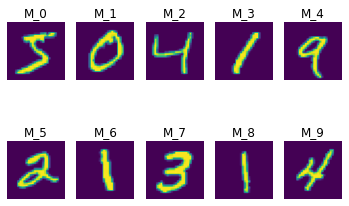

In [ ]:
#ループして、X_trainに入ったMNISTの画像データを試しに表示
for i in range(10):
  #pyplotで表示していく
  plt.subplot(2,5,i+1) #2行5列で、i+1番目の画像をプロット
  plt.title("M_%d" % i) #「M_0」のような形式でタイトルを表示
  plt.axis("off")#軸線をオフ
  plt.imshow(x_train[i].reshape(28,28),cmap=None)
  #ループ終わり
plt.show()


##データに前処理(画像サイズを正規化)
データを1文字分1行(１レコード)の形にする

In [ ]:

#28*28の画像を1行にすると、784ピクセルになる
#横に784個、0~255までのRGB色数値が並ぶようにする
#x_trainは60,000字(60,000行)分*784列の２次元配列に変換することになる
x_train = x_train.reshape(60000,784).astype('float32')
#x_testは10,000字(10,000行)分**784列の２次元配列に変換することになる
x_test = x_test.reshape(10000,784).astype('float32')
#画像ドットの色情報(RGB 0～255)を0～1の小数値の範囲に変換する
x_train /= 255 #x_trainのひとつひとつを、255で割った値で上書き
x_test /= 255 
#答えデータをnum_classes数(10)に分類
y_train = keras.utils.to_categorical(y_train, num_classes)#学習用
y_test = keras.utils.to_categorical(y_test,num_classes)#検証用


###変換したデータの形を表示して確認

In [ ]:
#学習 xデータ
print(x_train.shape)#60,000行(60,000文字レコード)784列
print(x_test.shape)#10,000行(10,000文字レコード)784列
print(y_train.shape)#60,000行(60,000文字レコード)、(num_class:0～9の分類)
print(y_test.shape)#10,000行(10,000文字レコード)、(num_class:0～9の分類)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


###学習モデルを組み立てる
生成した学習モデルのインスタンスに層を追加していく

In [ ]:
#学習モデル
model  =Sequential()


In [ ]:
#ニューラル層を作っていく
#784次元のデータが、任意の数だけ入力され、512次元の形で出力される
model.add(Dense(512,input_shape=(784,)))
#活性化関数をrelu関数に指定
model.add(Activation('relu'))
#Dropout(データを間引いて過学習を防ぐ)
model.add(Dropout(0.2))#20%の結果値を0にリセット


###2層目を追加する

In [ ]:
#ニューロン２層目の追加
model.add(Dense(512))#512の次元で出力される
#活性化関数をrelu関数に指定
model.add(Activation('relu'))
#Dropout(データを間引いて過学習を防ぐ)
model.add(Dropout(0.2))#20%の結果値を0にリセット

###学習モデルに３層目(最後の層)を追加する

In [ ]:
#ニューロンの３層目(出力先)の追加
model.add(Dense(num_classes))#最後は10個(num_calsses)に分類
#最後だけ活性化関数はsoftmaxを指定する
#(複数の出力値の合計が「1.0」(= 100%)になるような値を返してくれるから)
model.add(Activation('softmax'))


###組み立てた学習モデルの要約(サマリ・概要)を表示

In [ ]:
#学習モデルのサマリ
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

###学習モデルが動く形になるようにコンパイルする。

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',#損失の基準(交差エントロピー誤差)
    optimizer = RMSprop(),
    metrics=['accuracy']#accuracy=精度
)

##学習モデルに学習させる

In [ ]:
#コールバック処理の準備
#学習が進んで損失がそれ以上下がらなければ早期終了する
#patience=2は、2回学習分だけ終了まで様子を見る
es = EarlyStopping(monitor='val_loss', patience=2)
#ログ出力
csv_logger = CSVLogger('training.log')

#学習モデルに学習させる
#(正解データにフィットするように重みを調整する)
hist = model.fit(
    x_train,#学習用画像データ:問題
    y_train,#学習用数値データ:正解
    batch_size = batch_size,#バッチサイズ(batch_size=20)
    epochs = epochs, #エポック数(学習回数)(epochs=20)
    verbose = 1,#進行状況を表示
    validation_split = 0.1,#validationデータ(検証用データ、チェックデータ)の割合(10%:この分は学習に使わず、検証データに使う)
    callbacks = [es,csv_logger]#コールバック処理
)
#

Epoch 1/20
422/422 [==============================] - 10s 20ms/step - loss: 0.2628 - accuracy: 0.9196 - val_loss: 0.1123 - val_accuracy: 0.9665
Epoch 2/20
422/422 [==============================] - 8s 19ms/step - loss: 0.1094 - accuracy: 0.9667 - val_loss: 0.0914 - val_accuracy: 0.9740
Epoch 3/20
422/422 [==============================] - 8s 19ms/step - loss: 0.0773 - accuracy: 0.9763 - val_loss: 0.0790 - val_accuracy: 0.9805
Epoch 4/20
422/422 [==============================] - 8s 19ms/step - loss: 0.0641 - accuracy: 0.9811 - val_loss: 0.0714 - val_accuracy: 0.9800
Epoch 5/20
422/422 [==============================] - 9s 20ms/step - loss: 0.0514 - accuracy: 0.9845 - val_loss: 0.0736 - val_accuracy: 0.9802
Epoch 6/20
422/422 [==============================] - 8s 19ms/step - loss: 0.0426 - accuracy: 0.9870 - val_loss: 0.0746 - val_accuracy: 0.9840


##学習済みのモデルを使って、学習結果をテスト検証する

In [ ]:
#evaluateメソッドで検証する
score = model.evaluate(x_test,y_test,verbose=0)#検証結果を変数に代入
print('test loss:',score[0])#損失(誤り率)を表示
print('test acc:',score[1])#精度(正解率)を表示


test loss: 0.08031473308801651
test acc: 0.9815999865531921


##学習履歴をグラフ表示する


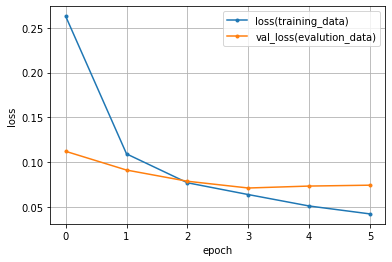

In [ ]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = len(loss)
plt.plot(range(epochs),loss, marker='.',label='loss(training_data)')
plt.plot(range(epochs),val_loss, marker='.',label='val_loss(evalution_data)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
#最後に表示
plt.show()